# start

In [2]:
# train-vgg16.py
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 63 bytes


In [3]:
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !rm -r ~/.kaggle #删除文件 （用于判断是否已经创建过kaggle文件夹）
# !mkdir -p ~/.kaggle  #创建文件夹
# !cp kaggle.json ~/.kaggle/ #复制kaggle.json到刚创建好的文件
# !chmod 600 ~/.kaggle/kaggle.json #更改文件夹权限

In [5]:
# download dataset
# https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection/code?sort=recent-comments
! kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 99% 15.0M/15.1M [00:01<00:00, 14.0MB/s]
100% 15.1M/15.1M [00:01<00:00, 8.64MB/s]


In [6]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


please ignore

In [7]:
# import tensorflow as tf
# from zipfile import ZipFile
# import os,glob
# import cv2
# from tqdm._tqdm_notebook import tqdm_notebook as tqdm
# import numpy as np
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
# from keras.layers import BatchNormalization
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# %matplotlib inline
# import matplotlib.pyplot as plt

In [8]:
# os.chdir('/content/yes')
# X = []
# y = []
# dataset=[]
# for i in tqdm(os.listdir()):
#       img = cv2.imread(i)
#       img = cv2.resize(img,(224,224))
#       X.append(img)
#       # y.append((i[0:1]))
#       y.append('Y')
#       # print(i)
# print(i)
# print(len(i))
# print(i[0:1])

# os.chdir('/content/no')
# for i in tqdm(os.listdir()):
#       img = cv2.imread(i)
#       try:
#         img = cv2.resize(img, (1400, 1000), interpolation=cv2.INTER_AREA)
#         # print(img.shape)
#       except:
#         print('error?')
#         break
#       img = cv2.resize(img,(224,224))
#       X.append(img)
# for i in range(1,99):
#     y.append('N')
# print(y)
# len(y)

In [9]:
# # plot the dataset
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# for i in range(4):
#     plt.subplot(1, 4, i+1)
#     # plt.imshow(X[i], cmap="gray")
#     plt.imshow(X[i])
#     plt.axis('off')
# plt.show()

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# print ("Shape of an image in X_train: ", X_train[0].shape)
# print ("Shape of an image in X_test: ", X_test[0].shape)

In [11]:
# le = preprocessing.LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)
# # Converts a class vector (integers) to binary class matrix.
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
# y_train = np.array(y_train)
# X_train = np.array(X_train)
# y_test = np.array(y_test)
# X_test = np.array(X_test)
# print("X_train Shape: ", X_train.shape)
# print("X_test Shape: ", X_test.shape)
# print("y_train Shape: ", y_train.shape)
# print("y_test Shape: ", y_test.shape)

# preprocessing for vit model

references:

https://huggingface.co/google/vit-base-patch16-224-in21k

https://www.kaggle.com/code/miladfa7/brain-tumor-detection-vision-transformer-99

https://huggingface.co/docs/transformers/model_doc/vit

https://pytorch.org/vision/stable/models.html

In [12]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.8 MB/s eta 0:00:00


In [13]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="/content/brain_tumor_dataset", split='train')
# /content/brain-mri-images-for-brain-tumor-detection.zip

print(dataset)

splits = dataset.train_test_split(test_size=0.3, seed=42, shuffle= True)
train_ds = splits['train']
val_ds = splits['test']

print(train_ds)
print(val_ds)


Resolving data files:   0%|          | 0/253 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/imagefolder/default-2a410b7934a0c2a9/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.
Dataset({
    features: ['image', 'label'],
    num_rows: 253
})
Dataset({
    features: ['image', 'label'],
    num_rows: 177
})
Dataset({
    features: ['image', 'label'],
    num_rows: 76
})


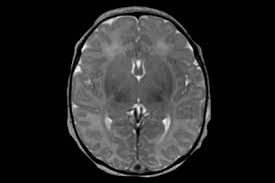

In [14]:
val_ds[7]['image']

In [15]:
# ennumerate labels
labels = dataset.features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label
print(label2id)
print(id2label)

{'no': 0, 'yes': 1}
{0: 'no', 1: 'yes'}


In [16]:
# !pip install transformers
!pip install transformers==4.26.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.3 MB/s eta 0:00:00


In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
from torchvision import transforms
from sklearn.model_selection import train_test_split
from datasets import load_metric
from sklearn.metrics import accuracy_score
from datasets import load_dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

In [18]:
import torch
from torchvision import transforms

In [19]:
# from transformers import ViTImageProcessor
from transformers import ViTImageProcessor

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
display(processor)

ViTImageProcessor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [20]:
from torchvision.transforms import CenterCrop,Compose,Normalize,RandomHorizontalFlip,RandomResizedCrop,Resize,ToTensor

# tranform images

image_mean, image_std = processor.image_mean, processor.image_std
size = processor.size["height"]

normalize = Normalize(mean=image_mean, std=image_std)
_train_transforms = Compose(
        [
            RandomResizedCrop(size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

_val_transforms = Compose(
        [
            Resize(size),
            CenterCrop(size),
            ToTensor(),
            normalize,
        ]
    )

def train_transforms(examples):
    examples['pixel_values'] = [_train_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

def val_transforms(examples):
    examples['pixel_values'] = [_val_transforms(image.convert("RGB")) for image in examples['image']]
    return examples

In [21]:
# Set the transforms
train_ds.set_transform(train_transforms)
val_ds.set_transform(val_transforms)
#test_ds.set_transform(val_transforms)


In [22]:
display(train_ds)
display(val_ds)

Dataset({
    features: ['image', 'label'],
    num_rows: 177
})

Dataset({
    features: ['image', 'label'],
    num_rows: 76
})

In [23]:
train_ds[:2]

{'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7C0DE51460B0>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x7C0DE51472B0>],
 'label': [1, 0],
 'pixel_values': [tensor([[[-0.9765, -0.9765, -0.9765,  ..., -1.0000, -1.0000, -1.0000],
           [-0.9765, -0.9843, -0.9765,  ..., -1.0000, -1.0000, -1.0000],
           [-0.9843, -0.9843, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [-0.9608, -0.9608, -0.9608,  ..., -1.0000, -1.0000, -1.0000],
           [-0.9608, -0.9608, -0.9608,  ..., -1.0000, -1.0000, -1.0000],
           [-0.9608, -0.9608, -0.9686,  ..., -1.0000, -1.0000, -1.0000]],
  
          [[-0.9765, -0.9765, -0.9765,  ..., -1.0000, -1.0000, -1.0000],
           [-0.9765, -0.9843, -0.9765,  ..., -1.0000, -1.0000, -1.0000],
           [-0.9843, -0.9843, -0.9843,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [-0.9608, -0.9608, -0.9608,  ..., -1.0000, -1.0000, -1.0000],
           [-0.9608,

# ViT model

In [24]:
from transformers import ViTForImageClassification

# model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k')

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224-in21k',id2label=id2label,label2id=label2id)

Some weights of the model checkpoint at google/vit-base-patch16-224-in21k were not used when initializing ViTForImageClassification: ['pooler.dense.bias', 'pooler.dense.weight']
- This IS expected if you are initializing ViTForImageClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ViTForImageClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
display(model)

ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=7

In [26]:
# # !pip install accelerate -U
# !pip install transformers[torch]

In [27]:
from transformers import TrainingArguments, Trainer
# import transformers[torch]

metric_name = "accuracy"

args = TrainingArguments(
    "brain_tumor_detection_v12",
    save_strategy="epoch",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=4,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_dir='logs',
    report_to='tensorboard',
    remove_unused_columns=False,
)


In [28]:
def collate_fn(batch):
    pixel_values = torch.stack([x["pixel_values"] for x in batch])
    labels = torch.tensor([x["label"] for x in batch])
    return {"pixel_values": pixel_values, "labels": labels}


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return dict(accuracy=accuracy_score(predictions, labels))

In [29]:
trainer = Trainer(
    model,
    args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)

# evaluate

In [30]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 177
  Num Epochs = 10
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 120
  Number of trainable parameters = 85800194


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.602944,0.657895
2,No log,0.562469,0.789474
3,No log,0.481839,0.868421
4,No log,0.431519,0.894737
5,No log,0.383108,0.881579
6,No log,0.348664,0.894737
7,No log,0.315131,0.907895
8,No log,0.299645,0.921053
9,No log,0.297499,0.907895
10,No log,0.288736,0.921053


***** Running Evaluation *****
  Num examples = 76
  Batch size = 4
Saving model checkpoint to brain_tumor_detection_v12/checkpoint-12
Configuration saved in brain_tumor_detection_v12/checkpoint-12/config.json
Model weights saved in brain_tumor_detection_v12/checkpoint-12/pytorch_model.bin
Image processor saved in brain_tumor_detection_v12/checkpoint-12/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 76
  Batch size = 4
Saving model checkpoint to brain_tumor_detection_v12/checkpoint-24
Configuration saved in brain_tumor_detection_v12/checkpoint-24/config.json
Model weights saved in brain_tumor_detection_v12/checkpoint-24/pytorch_model.bin
Image processor saved in brain_tumor_detection_v12/checkpoint-24/preprocessor_config.json
***** Running Evaluation *****
  Num examples = 76
  Batch size = 4
Saving model checkpoint to brain_tumor_detection_v12/checkpoint-36
Configuration saved in brain_tumor_detection_v12/checkpoint-36/config.json
Model weights saved in brain

***** train metrics *****
  epoch                    =        10.0
  total_flos               = 127740969GF
  train_loss               =      0.4098
  train_runtime            =  0:00:57.40
  train_samples_per_second =      30.832
  train_steps_per_second   =        2.09


In [31]:
metrics = trainer.evaluate(val_ds)
trainer.log_metrics("validation", metrics)
trainer.save_metrics("validation", metrics)

***** Running Evaluation *****
  Num examples = 76
  Batch size = 4


***** validation metrics *****
  epoch                   =       10.0
  eval_accuracy           =     0.9211
  eval_loss               =     0.2996
  eval_runtime            = 0:00:00.70
  eval_samples_per_second =     107.17
  eval_steps_per_second   =     26.792


***** Running Prediction *****
  Num examples = 76
  Batch size = 4


{'test_loss': 0.2996448576450348, 'test_accuracy': 0.9210526315789473, 'test_runtime': 0.6773, 'test_samples_per_second': 112.206, 'test_steps_per_second': 28.051}


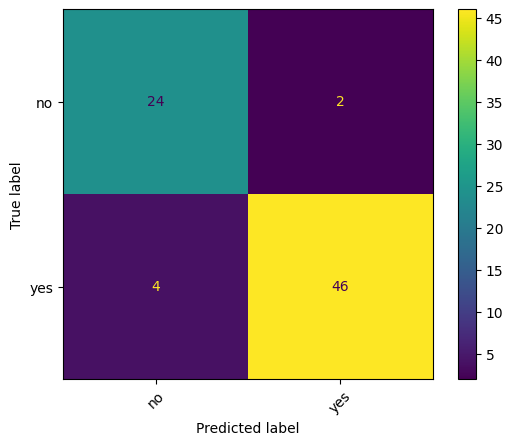

In [32]:
outputs_val = trainer.predict(val_ds)
print(outputs_val.metrics)

y_true = outputs_val.label_ids
y_pred = outputs_val.predictions.argmax(1)

labels = train_ds.features['label'].names
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)

please ignore

In [33]:
# from keras.applications import vgg16


# img_rows, img_cols = 224, 224


# vgg = vgg16.VGG16(weights = 'imagenet',
#                  include_top = False,
#                  input_shape = (img_rows, img_cols, 3))

# # Here we freeze the last 4 layers
# # Layers are set to trainable as True by default
# for layer in vgg.layers:
#     layer.trainable = False

In [34]:
# # Let's print our layers
# for (i,layer) in enumerate(vgg.layers):
#     print(str(i) + " "+ layer.__class__.__name__, layer.trainable)


In [35]:
# vgg.output

In [36]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
# from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
# from keras.models import Model

# def top_layers(bottom_model,num_classes):
#   """create the top or head of the model that will be
#   placed on top of the bottom layers"""
#   top_model = bottom_model.output
#   top_model = GlobalAveragePooling2D()(top_model)
#   top_model = Dense(1024, activation='relu')(top_model)
#   top_model = Dense(1024, activation='relu')(top_model)
#   top_model = Dense(512, activation='relu')(top_model)
#   top_model = Dense(num_classes, activation='softmax')(top_model)
#   # top_model = Dense(num_classes, activation='sigmoid')(top_model)
#   return top_model

In [37]:
# num_classes = 2

# FC_Head = top_layers(vgg, num_classes)

# model = Model(inputs = vgg.input, outputs = FC_Head)

# print(model.summary())

In [38]:
# # from tensorflow.keras.models import Model
# model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [39]:
# history = model.fit(X_train,y_train,
#                     epochs=5,
#                     validation_data=(X_test,y_test),
#                     verbose = 1,
#                     initial_epoch=0)

In [40]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()